In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('obesity_data.csv')
dataset.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [3]:
# Data Exploration
dataset.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [5]:
dataset.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


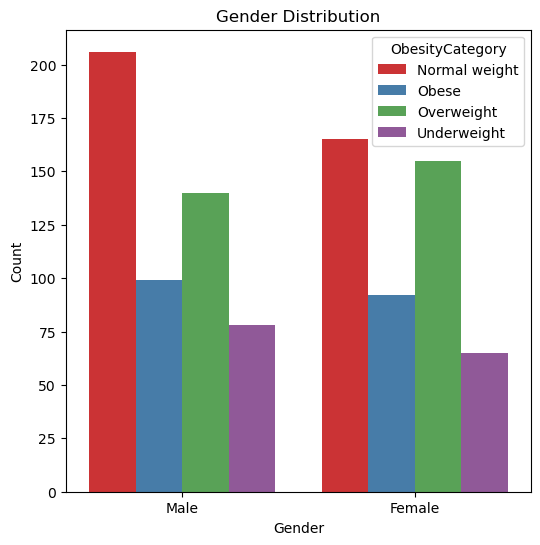

In [6]:
plt.figure(figsize=(6, 6))  # Set the figure size
sns.countplot(x="Gender", data=dataset, palette="Set1", hue='ObesityCategory')  # Use a visually appealing color palette
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

0.13.2


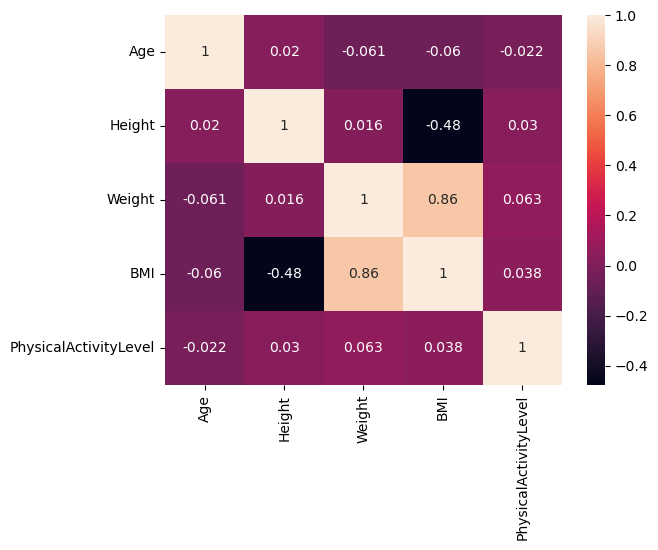

In [7]:
print(sns.__version__)
corr = dataset.drop(["Gender", "ObesityCategory"], axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
#Label Encoding
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

In [10]:
X, y = dataset.drop(['ObesityCategory'], axis =1), dataset['ObesityCategory']

In [13]:
### Split test data for later testing before training
train, test, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
k_folds = 10
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

In [15]:
### Decision Tree with K-Fold
decision_tree_classifier = DecisionTreeClassifier()
for train_index, test_index in tqdm(stratified_kfold.split(train, train_y), total=k_folds, desc="Cross-validation"):
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]

    decision_tree_classifier.fit(X_train, y_train)

    y_pred = decision_tree_classifier.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Cross-validation: 100%|██████████| 10/10 [00:00<00:00, 68.86it/s]

[[26  0  0  0]
 [ 0 14  0  0]
 [ 0  0 20  0]
 [ 0  0  0 10]]
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00        26
        Obese       1.00      1.00      1.00        14
   Overweight       1.00      1.00      1.00        20
  Underweight       1.00      1.00      1.00        10

     accuracy                           1.00        70
    macro avg       1.00      1.00      1.00        70
 weighted avg       1.00      1.00      1.00        70

[[26  0  0  0]
 [ 0 14  0  0]
 [ 0  0 20  0]
 [ 0  0  0 10]]
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00        26
        Obese       1.00      1.00      1.00        14
   Overweight       1.00      1.00      1.00        20
  Underweight       1.00      1.00      1.00        10

     accuracy                           1.00        70
    macro avg       1.00      1.00      1.00        70
 weighted avg       1.00      1.00      1.00    

In [16]:
y_pred = decision_tree_classifier.predict(test)

print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

[[110   0   0   1]
 [  0  57   0   0]
 [  0   0  89   0]
 [  0   0   0  43]]
               precision    recall  f1-score   support

Normal weight       1.00      0.99      1.00       111
        Obese       1.00      1.00      1.00        57
   Overweight       1.00      1.00      1.00        89
  Underweight       0.98      1.00      0.99        43

     accuracy                           1.00       300
    macro avg       0.99      1.00      1.00       300
 weighted avg       1.00      1.00      1.00       300



In [17]:
# Calculate the accuracy ofthe model
accuracy = accuracy_score(test_y, y_pred)
accuracy

0.9966666666666667